## Exploring Session Level Data

Based off of alvaros [notebook](https://github.com/Brody-Lab/bl_pipeline_python/blob/main/notebooks/tutorials/Explore_Sessions_Data.ipynb). To eventually be turned into a script. 

In [1]:
# import
import numpy as np
import pylab as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import datajoint as dj
import pandas as pd
import seaborn as sns
sns.set_context("talk")

In [2]:
# grab sessions table
acquisition = dj.create_virtual_module('new_acquisition', 'bl_new_acquisition')

# select animal
subject_session_key = {'session_rat': 'R500'}

# make df
sessions_df = pd.DataFrame((acquisition.Sessions & subject_session_key).fetch(as_dict=True))

sessions_df

[2022-08-04 14:49:42,475][INFO]: Connecting jbreda@datajoint01.pni.princeton.edu:3306
[2022-08-04 14:49:42,654][INFO]: Connected jbreda@datajoint01.pni.princeton.edu:3306


,sessid,session_rat,session_userid,session_rigid,session_date,session_starttime,session_endtime,protocol,peh,n_done_trials,...,total_correct,right_correct,left_correct,percent_violations,protocol_data,left_pokes,center_pokes,right_pokes,ip_addr,foodpuck
0,879474,R500,jm62,404,2022-07-19,0 days 10:49:46,0 days 11:57:01,DMS,None,28,...,0.54,0.62,0.47,0.00,None,520,612,704,128.112.222.46,0
1,879662,R500,jbreda,404,2022-07-20,0 days 11:38:31,0 days 12:27:40,DMS,None,53,...,0.94,0.90,0.99,0.00,None,158,196,172,128.112.222.46,0
2,879811,R500,jbreda,404,2022-07-21,0 days 10:26:37,0 days 11:27:59,DMS,None,10,...,0.70,0.80,0.60,0.00,None,124,308,112,128.112.222.46,0
3,879983,R500,jbreda,404,2022-07-22,0 days 09:05:23,0 days 09:51:26,DMS,None,5,...,0.40,0.00,0.67,0.00,None,78,224,110,128.112.222.46,0
4,880131,R500,jbreda,404,2022-07-23,0 days 09:24:37,0 days 10:10:42,DMS,None,6,...,0.67,0.99,0.50,0.00,None,98,48,96,128.112.222.46,0
5,880143,R500,jbreda,404,2022-07-24,0 days 09:23:04,0 days 10:14:59,DMS,None,7,...,0.71,0.75,0.67,0.00,None,228,38,200,128.112.222.46,0
6,880160,R500,jbreda,404,2022-07-25,0 days 09:40:10,0 days 10:34:01,DMS,None,73,...,0.99,0.99,0.99,0.00,None,112,24,230,128.112.222.46,0
7,880205,R500,jbreda,404,2022-07-26,0 days 10:52:41,0 days 11:52:43,DMS,None,88,...,0.99,0.99,0.99,0.00,None,272,24,220,128.112.222.46,0
8,880269,R500,jbreda,404,2022-07-27,0 days 09:31:42,0 days 10:38:46,DMS,None,59,...,0.99,0.99,0.99,0.00,None,548,218,446,128.112.222.46,0
9,880327,R500,jbreda,404,2022-07-28,0 days 11:01:51,0 days 12:03:44,DMS,None,106,...,0.46,0.49,0.44,0.00,None,456,358,452,128.112.222.46,0


## Plot Stage Number

In [3]:
def get_stage_number(session_df):
    """
    Function to parse comments fields of session
    table and grab the stage number the animal was in
    and append to sessions dataframe if not already
    done.
    
    inputs
    ------
    session_df : data frame
            data frame from datajoint
    returns
    ------
    session_df[stage_number]
    
    """
    
    if 'stage_number' in sessions_df:
        return 

    comments = sessions_df['session_comments']
    stage_numbers = []
    for sess_comm in comments:
        split = sess_comm.split(';') 
        stripped = [ii.strip() for ii in split] # get rid of white space after split
        stage_numbers.append(int(stripped[1][0])) # grab stage number
    sessions_df['stage_number'] = stage_numbers
    sessions_df['stage_number'].astype('category')

In [4]:
get_stage_number(sessions_df)
rat_name = sessions_df['session_rat'][0]

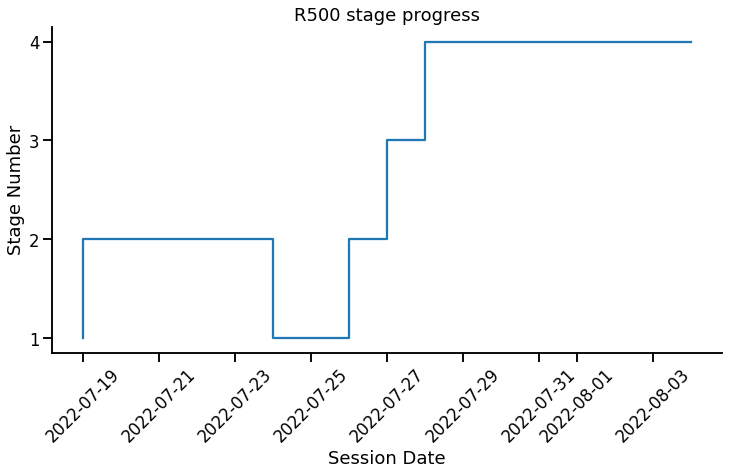

In [6]:
fig, ax = plt.subplots(1,1, figsize = (12, 6))
sns.despine()
plt.step(sessions_df["session_date"], sessions_df["stage_number"])
y = plt.yticks(np.arange(1,max(sessions_df["stage_number"]) + 1, 1))
x = plt.xticks(rotation = 45)
z = ax.set(ylabel = "Stage Number", xlabel = "Session Date", title=f'{rat_name} stage progress')

### TO DO:

* Write plotting into a function that saves out to animals directory 

* Write function to iterate over animal names, load data, and make plot for each animal